In [1]:
%load_ext autoreload
%autoreload 2

# IMPORTS

In [5]:
import os
from dotenv import load_dotenv

# data
import numpy as np
import pandas as pd

# eda
import missingno as msng
import sweetviz as sv

from src.general.io import from_pickle
from src.visualization.plotting import plot_moments_histogram

# PATHS & NAMES

In [4]:
load_dotenv()

RAW_DATA_PATHS = {}
for short_name, filename in zip(["test"],["test.csv"]):
    RAW_DATA_PATHS[short_name] = f"..{os.getenv('RAW_DATA_DIR')}/{filename}"


EXT_DATA_PATHS = {}
for short_name, filename in zip(["test"],["test.pkl"]):
    EXT_DATA_PATHS[short_name] = f"..{os.getenv('EXTERNAL_DATA_DIR')}/{filename}"


INTERIM_DATA_PATHS = {}
for short_name, filename in zip(["test"],["test.pkl"]):
    INTERIM_DATA_PATHS[short_name] = f"..{os.getenv('INTERIM_DATA_DIR')}/{filename}"


EDA_REPORT_PATHS = {}
for short_name in RAW_DATA_PATHS.keys():
    EDA_REPORT_PATHS[short_name] = f"..{os.getenv('REPORT_DIR')}/eda_{short_name}.html"

YN_READ = False

# DATA

## Raw

### csv

In [ ]:
if YN_READ:
    raw = pd.read_csv(RAW_DATA_PATHS["test"])
    raw.info()

### excel

In [6]:
if YN_READ:
    raw = pd.read_excel(RAW_DATA_PATHS["test"])
    raw.info()

## Interim

In [7]:
if YN_READ:
    interim = from_pickle(INTERIM_DATA_PATHS["test"])
    interim.info()

# MISSINGS

In [8]:
msng.bar(raw)

# EDA

## sweetviz

In [42]:
raw = raw.fillna("NA")
report = sv.analyze(raw)
report.show_html(EDA_REPORT_PATHS["test"], open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report ../reports/eda_feedback.html was generated.


In [38]:
report.show_notebook()

## statistical moments

Good for embedings, which are supposed to be normalized, therefore 1st, 2nd, 3rd, 4th moments should be similar to normal distribution

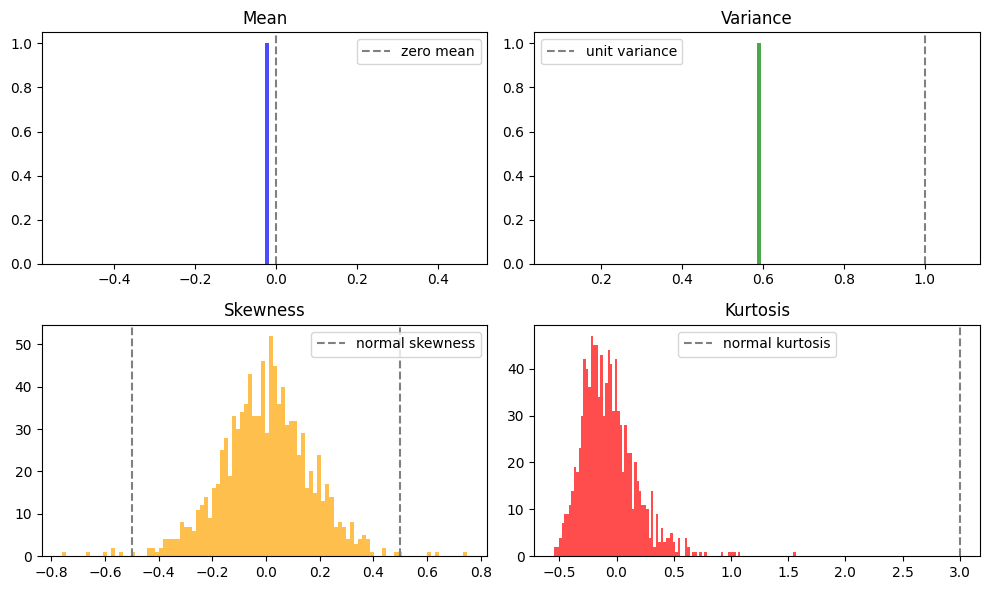

In [6]:
plot_moments_histogram(interim, figsize=(10,6), bins=100)